# **Linear Regression**

Before diving into Linear Regression, we need to know what exactly "regression" is.

Regression is basically the way you find the new value from existing values. What does it mean to find the new value from existing values though? 

Suppose we have a data containing the relationship between the height and the weight.
For instance, 5.5 feet - 60 kg, 5.4 feet - 50kg and so on.

We will have a lot of these height-weight data. And from that data, we derive a certain pattern. Like, for each feet the weight is X. And then from this pattern, we predict or find the new weight for new height.

We will apply this down the line.

### **Now what is "linear" in Linear Regression?**

There are several regression methods, but Linear regression in particular is the way you predict the values from the data which is in **linear** format.

But what does it mean that the data is in linear format?

If the dependent variable increases or decreases with the increse or decrease of your independent variable in uniform way, it's called a linear format.

Example:
- if you age older, your weight will increase with your age, right? (assuming from birth to adulthood)
- With the increase of rounds per minute (rpm) of your wheel, the faster you move, and the faster you get to your destination (assuming no gear changes and no brakes applied)
- the less your spending capacity, the less you buy what you want.

### **Practical Example with Height-Weight data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We will be using Numpy for calculations and Matplotlib for plotting the data.

Now let's import the Height-Weight dataset.

In [2]:
data = np.loadtxt("/kaggle/input/weight-hight-dataset/weight-height (1).csv", delimiter=",", skiprows=1, usecols=(1, 2), dtype="float")
print(data)
print(f"\n {data.shape}")

[[ 73.84701702 241.89356318]
 [ 68.78190405 162.31047252]
 [ 74.11010539 212.74085556]
 ...
 [ 63.86799221 128.47531878]
 [ 69.03424313 163.85246135]
 [ 61.94424588 113.64910268]]

 (10000, 2)


As we can see the data, we have height in inches and weight in pounds.

And we have 10 thousand rows and 2 columns. That's a lot of data there.

Let's put the Height in **x** and Weight in **y**, so that we can plot and analyze how our data looks like.

In [3]:
x = (data[:, 0]) 
y = (data[:, 1]) 

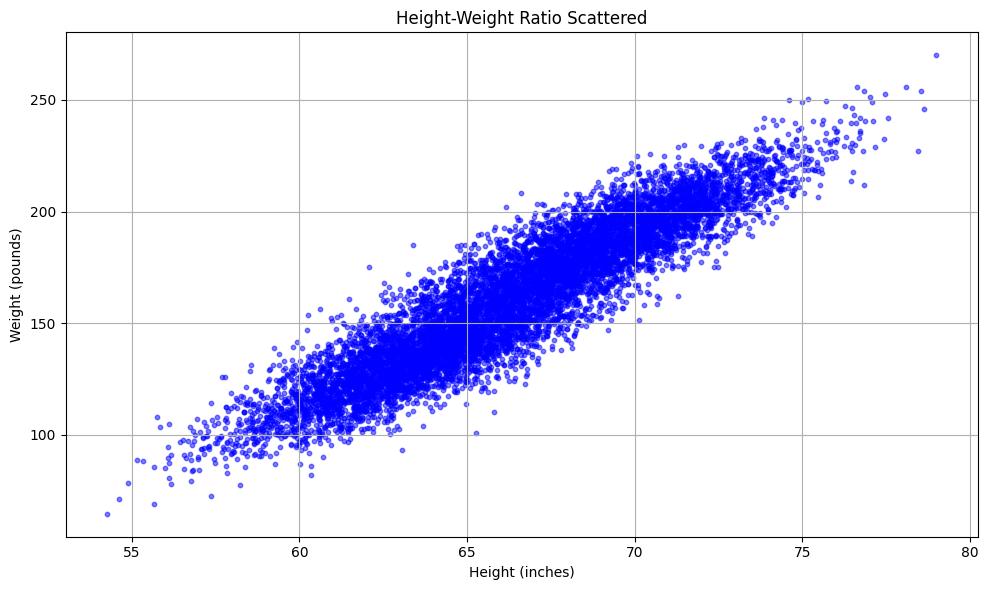

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, s=10, color='blue')
plt.grid(True)
plt.title("Height-Weight Ratio Scattered")
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.tight_layout()
plt.show()

Woah, this is how our data looks like when we plot into the graph. 

As you can see, there is a continuous change in weight.
5ft tall people range from 40-60 kg.
5.5 ft tall people ranging from 55 to almost 90 and so on.

Here, we need to find what is the best pattern of height-weight that defines this dataset. By how much weight increases with the increase of height **according to this data**.

**How are we going to find the pattern though?**

We will be using Ordinary Least Squares(OLS) method for this. 

We did see our data right? We will draw a line such that, each and every point in the graph is the nearest to the line.

OLS finds the line that minimizes the sum of squared vertical distances (distance from the point to the line) from each data point to the line. We square the distances to prevent negative and positive errors from canceling each other out, ensuring we're truly minimizing the total error.

And that line is called **best-fit line**.

Where best-fit line is just a slope i.e. how much y changes due respect to x, in a straight line which starts from when x is 0 (intercept).

**Now how are we going to find the best-fit line?**

Fortunately, we already have a formula that one-shots the best-fit line for us.

1. Calculate the average of x and y (mean)
2. Calculate how much x and y vary together i.e. Covariance(x,y)
3. Calculate how much x varies by itself i.e. Variance(x)
4. Calculate the slope(m) i.e. Covariance(x,y) divided by Variance(x) (how much y changes with respect to x)
5. Calculate the intercept i.e. c = avg of (y) - m * avg of (x) (value of y when x=0)

Formula is:

m = Σ[(xi - x̄)(yi - ȳ)] / Σ[(xi - x̄)²], where xi is the independent variable, x hat is average of x, yi is dependent variable and y hat is average of y.

In [5]:
# 1. Calculating the average of x and y

x_mean = np.mean(x)
y_mean = np.mean(y)

print(x_mean)
print(y_mean)

66.36755975482124
161.44035683283076


Here, the average height is 66.37 inches and the average weight is 161.44 pounds.

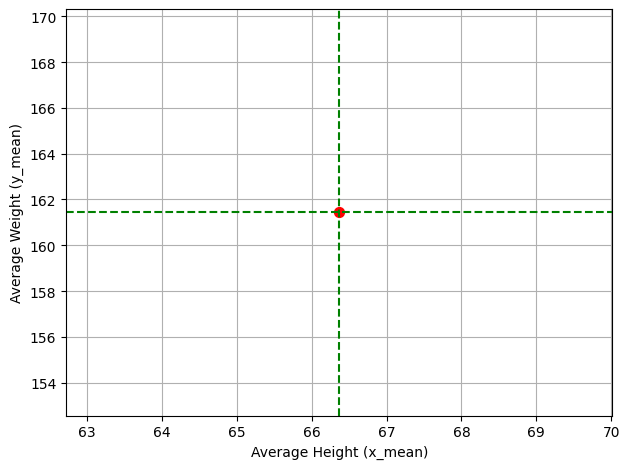

In [6]:
plt.axvline(x=x_mean, color='green', linestyle='--', label=f'Average Height: {x_mean:.1f}')
plt.axhline(y=y_mean, color='green', linestyle='--', label=f'Average Weight: {y_mean:.1f}')

plt.scatter(x_mean, y_mean, color="red", s=50)
plt.grid(True)
plt.xlabel("Average Height (x_mean)")
plt.ylabel("Average Weight (y_mean)")

plt.tight_layout()
plt.show()

What this means is, our best-fit line should pass through this point or just pass closely to this red point (66.37, 161.44)

In [7]:
# 2. Calculate how much x and y vary together (Σ[(xi - x̄)(yi - ȳ)])

x_deviation = x - x_mean
y_deviation = y - y_mean

print(x_deviation, y_deviation)

covariance = np.sum(x_deviation * y_deviation)/(len(x)-1) # or we can just use x_deviation @ y_deviation
covariance

[ 7.47945726  2.41434429  7.74254564 ... -2.49956754  2.66668338
 -4.42331388] [ 80.45320635   0.87011569  51.30049872 ... -32.96503805   2.41210451
 -47.79125416]


114.24265644646304

As we can see above, there are both positive and negative deviations from the mean.

x_deviation tells us how much a person is taller or shorter than the average. Positive tells us taller and negative denotes shorter.
While, y_deviation tells us how much a person is far or near from average weight.

114.24 is our covariance.

In [8]:
# Calculate how much x varies by itself

# since we have already calculated the x - x_mean, which is x_deviation, we will use that

variance = np.sum((x_deviation) ** 2)/(len(x)-1)
variance

14.803472640140773

In [9]:
# Calculate the slope or our best-fit-line

slope = covariance / variance
print(slope)

7.717287640785389


This means, according to our dataset, there is 7.71 pounds of increase with each increase of an inch in height.

In [10]:
# Calculate the intercept

intercept = y_mean - slope * x_mean
intercept

-350.737191812137

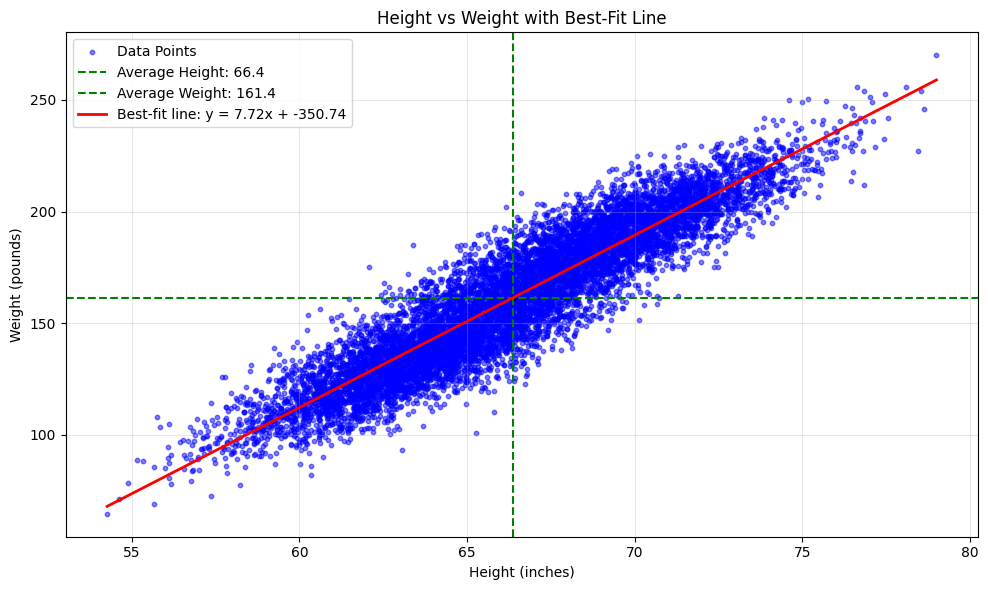

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, s=10, color='blue', label='Data Points')

# average data
plt.axvline(x=x_mean, color='green', linestyle='--', label=f'Average Height: {x_mean:.1f}')
plt.axhline(y=y_mean, color='green', linestyle='--', label=f'Average Weight: {y_mean:.1f}')

plt.scatter(x_mean, y_mean, color="black", s=10)

x_line = np.linspace(min(x), max(x), 100)  # 100 points from min to max height
y_line = slope * x_line + intercept

# Plot the best-fit line
plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Best-fit line: y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Height vs Weight with Best-Fit Line')
plt.legend()
plt.grid(True, alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

As we can see, our best-fit-line passes through our average height-weight.

Our intercept is -350.74, but how can this be possible in reality? How can a man be of -350 pounds when his height is 0. But let's find that out by predicting some values.

In [12]:
test_height1 = data[45, 0] # 70.1 inches tall male has weight of 188.92 pounds in our dataset
test_weight1 = data[45, 1]
print(f"test height 1: {test_height1}")
print(f"test weight 1: {test_weight1}")

prediction1 = slope * 70.1047 + intercept
print(f"predicted weight 1: {prediction1} \n")

test_height2 = data[9999, 0]
test_weight2 = data[9999, 1]
print(f"test height 2: {test_height2}")
print(f"test weight 2: {test_weight2}")

prediction2 = slope * 61.9442458795172 + intercept
print(f"predicted weight 2: {prediction2}")

prediction2 - test_weight2

test height 1: 70.1047862551571
test weight 1: 188.922303151274
predicted weight 1: 190.28094305883042 

test height 2: 61.9442458795172
test weight 2: 113.649102675312
predicted weight 2: 127.30437133163235


13.65526865632036

Even though when a persons' height is 0 (which is practically impossible), and when it's 0, the weight is -350 pounds, which is also impossible pragmatically, this pattern is valid for **this particular dataset**.

Also, at the first test, we got the error of 1.359 pounds, which is good. However in the second test, we got the error of 13.66 pounds, which is huge. This suggests something important about linear regression. That is, Linear Regression model derives the generalized pattern for a whole dataset, which might not be best-fit for individual data as we saw in test2 with huge marginal error.

#### **Now it's time to Evaluate our model**

- How would you know how good your model is? 
- Or how would you know if this model can be trusted?
- How error-prone is this model?

These are the questions we should ask ourselves after designing a model.

And to answer the above question, let us first find the predicted value for all the heights given.

In [13]:
y_predict = slope * x + intercept
y_predict

array([219.16147993, 180.07254619, 221.19180859, ..., 142.15047514,
       182.01991949, 127.30437133])

As you can see, we have all the predicted value of our given height.

### **Evaluation Metrics**

What is it? 

->  Evaluation metrics help us to measure the effectiveness of our models. Basically, it tells us how reliable our model is, how much of the error has it got and if it's usable or not.

We will be using R-squared and RMSE (Rooted Mean Squared Error) here.

#### **R-Squared**

 It's specifically about comparing your model to the simplest possible "model", which is mean.
 
 The intuition around this is that how better is it from the mean? It just measures how better our model is from mean. Period.

 Formula for R-quared is:
 R² = 1 - (var_residuals / var_mean)

 Where, var_residuals represent variation around residuals (residuals = diff in actual value of y and predicted value). And var_mean represents the variation around mean i.e. sum of difference between actual value y and mean of actual value.

 Basically, we want to know how good is our prediction from the mean? Since we got our mean of actual y values, it shows that we are just lazy and told everyone that every person weighs around 161.44 lbs, doesnt matter the height. However, we got active and we actually want to find how weight varies by height, or bone density, or fat amount, etc. We wanted to know how much does the height decide the weight of the person? And we made the model to predict this. Now we have our predicted value, R-squared basically says how good is our predicted value from the mean value.

 The actual formula is: (var_mean - var_residuals) / var_mean

In [14]:
r2 = 1 - np.sum((y - y_predict) ** 2) / np.sum((y - y_mean) ** 2)
r2

0.8551742120609958

We got the good 0.856 for r-squared evaluation.

What this means is, we decreased the error by 85% by being active than just telling people that each and every person weighs around 161.44 lbs.

But here is something to note about:

R-squared measures only how much better is our model or the predicted value than the mean value.

On the other hand, we can interpret the value found in different forms, like;
- Model performance: Predictions improved by 85% than just calculating mean.
- Variance explained: This model tells that the height explains 85% of variance in the weight.
- Relationship Strength: Weight varies strongly with height. Since value of r2 is closer to 1.


#### **Rooted Mean Squared Error (RMSE)**

Now what is this?

RMSE is basically the root of average squared errors. RMSE is built upon the MSE which is Mean Squared errors. It tells us how much error did we have in average.

To understand RMSE, we need to understand MSE. So what's MSE? **MSE** is collecting all the errors (actual value - predicted value), squaring them one by one and then deriving their sum. 

But why square though? We can just sum up the errors. We can, but there is the thing:

Suppose we have,
- Person 1: Predicted 150, Actual 160 → Error = -10
- Person 2: Predicted 170, Actual 160 → Error = +10
- Person 3: Predicted 155, Actual 150 → Error = +5
- Person 4: Predicted 145, Actual 140 → Error = +5

If we summed them up, it would be (-10+10+5+5) which would be 10. MSE = mean of sum = 10/4 = 2.5 Huh? We clearly had more errors tha 2.5, but we are getting 2.5. Exactly, to avoid canceling of the positive erros with negative erros, we square them and get the value.

Then **RMSE** is just deriving the square root of MSE.

The formula for MSE would be: **MSE** = ```Σ(yi - ŷi)² / n```

And for RMSE it would be: **RMSE** = ```√MSE```

where ```yi``` is actual value, ```ŷi``` is predicted value and ```n``` is number of data points.

Just basically finding the ```mean``` of ```errors``` and then finding the ```root```

In [15]:
mse = np.mean((y - y_predict) ** 2)
mse

149.2934839491296

It suggests that the average of our squared error is ```149.29```

In [16]:
rmse = np.sqrt(mse)
rmse

12.218571272826035

Alright, we got the average error in our predicted value, which is ```12.22```

Now, how do we know if this result we got is optimal? If it could be trusted or not. Or if our model did a good job?

Let's find the relative error.

In [17]:
relerror = rmse / y_mean * 100
relerror

7.568473901156075

So we got ```7.57 %``` error, pretty good!

#### **What's Next?**

Ordinary Least Squared method is only good for simple linear regression, meaning only one independent variable and one dependent variable. But this is not how it works in real life. Do you think only height justifies the change in our weight? Yeah it is mostly true but bone density, fat percentage, nutrition, workouts also play roles. 

So one output can depend on a lot of indepent variables. And we solve it using Multi-variable Linear Regression. We find slope for each relationship, and we use gradient descent for this. Since OLS will be messy.

Gradient descent is an important concept. So we will try to apply this very thing in Simple Linear regression first to get comfortable. We will use the same dataset and compare the results with OLS one.

Signing off. 